# This is an Iris estimator built using a simple and plain estimator.
#### The tutorial were taken from Google Cloud Platform's tutorial on plain and simple estimator


In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

1.7.0


## The datasets were taken from sources: https://en.wikipedia.org/wiki/Iris_flower_data_set

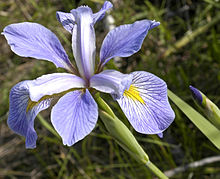

A picture of iris flower

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.learn.python.learn.datasets import base

# Data files
IRIS_TRAINING = r"C:\Users\420Moyase\Documents\iris_training.csv"
IRIS_TEST = r"C:\Users\420Moyase\Documents\iris_test.csv"

# Load datasets.
training_set = base.load_csv_with_header(filename=IRIS_TRAINING, features_dtype=np.float32,
                                     target_dtype=np.int)
test_set = base.load_csv_with_header(filename=IRIS_TEST,
                                     features_dtype=np.float32,
                                     target_dtype=np.int)

print(training_set.data)

print(training_set.target)

[[6.4 2.8 5.6 2.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]
 [6.9 3.1 5.1 2.3]
 [6.7 3.1 4.4 1.4]
 [5.1 3.7 1.5 0.4]
 [5.2 2.7 3.9 1.4]
 [6.9 3.1 4.9 1.5]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [7.7 3.8 6.7 2.2]
 [6.3 3.3 4.7 1.6]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [6.4 3.2 5.3 2.3]
 [5.7 4.4 1.5 0.4]
 [6.7 3.3 5.7 2.1]
 [6.4 2.8 5.6 2.1]
 [5.4 3.9 1.3 0.4]
 [6.1 2.6 5.6 1.4]
 [7.2 3.  5.8 1.6]
 [5.2 3.5 1.5 0.2]
 [5.8 2.6 4.  1.2]
 [5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.3 2.3 4.4 1.3]
 [5.1 2.5 3.  1.1]
 [6.4 3.2 4.5 1.5]
 [6.8 3.  5.5 2.1]
 [6.2 2.8 4.8 1.8]
 [6.9 3.2 5.7 2.3]
 [6.5 3.2 5.1 2. ]
 [5.8 2.8 5.1 2.4]
 [5.1 3.8 1.5 0.3]
 [4.8 3.  1.4 0.3]
 [7.9 3.8 6.4 2. ]
 [5.8 2.7 5.1 1.9]
 [6.7 3.  5.2 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.  2.2 5.  1.5]
 [4.8 3.4 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [4.6 3.6 1.  0.2]
 [7.2 3.2 6.  1.8]
 [5.  3.3 1.4 0.2]
 [6.6 3.  4.4 1.4]
 [6.1 2.8 4.

In [4]:
feature_name = "flower_features"
feature_columns = [tf.feature_column.numeric_column(feature_name, 
                                                    shape=[4])]

classifier = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    n_classes=3,
    model_dir="/tmp/iris_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/iris_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000240B9185588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [5]:
def input_fn(dataset):
    def _fn():
        features = {feature_name: tf.constant(dataset.data)}
        label = tf.constant(dataset.target)
        return features, label
    return _fn

print(input_fn(training_set)())


({'flower_features': <tf.Tensor 'Const:0' shape=(120, 4) dtype=float32>}, <tf.Tensor 'Const_1:0' shape=(120,) dtype=int32>)


In [6]:
classifier.train(input_fn=input_fn(training_set),
               steps=1000)
print('fit done')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/iris_model\model.ckpt.
INFO:tensorflow:loss = 131.83345, step = 1
INFO:tensorflow:global_step/sec: 739.784
INFO:tensorflow:loss = 37.13907, step = 101 (0.138 sec)
INFO:tensorflow:global_step/sec: 1010.43
INFO:tensorflow:loss = 27.85937, step = 201 (0.098 sec)
INFO:tensorflow:global_step/sec: 1265.46
INFO:tensorflow:loss = 23.044888, step = 301 (0.078 sec)
INFO:tensorflow:global_step/sec: 1242.73
INFO:tensorflow:loss = 20.05803, step = 401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1284.1
INFO:tensorflow:loss = 18.008251, step = 501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1398.89
INFO:tensorflow:loss = 16.505016, step = 601 (0.072 sec)
INFO:tensorflow:global_step/sec: 1173.39
INFO:tensorflow:loss 

In [7]:
accuracy_score = classifier.evaluate(input_fn=input_fn(test_set), 
                                     steps=100)["accuracy"]
print('\nAccuracy: {0:f}'.format(accuracy_score))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-18-12:14:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/iris_model\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [10/100]
INFO:tensorflow:Evaluation [20/100]
INFO:tensorflow:Evaluation [30/100]
INFO:tensorflow:Evaluation [40/100]
INFO:tensorflow:Evaluation [50/100]
INFO:tensorflow:Evaluation [60/100]
INFO:tensorflow:Evaluation [70/100]
INFO:tensorflow:Evaluation [80/100]
INFO:tensorflow:Evaluation [90/100]
INFO:tensorflow:Evaluation [100/100]
INFO:tensorflow:Finished evaluation at 2018-04-18-12:14:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.96666664, average_loss = 0.12096449, global_step = 1000, loss = 3.6289346

Accuracy: 0.966667


# The estimator is able to achieve and accuracy of 96.6667%